In [1]:
import tensorflow as tf

# change path to the correct path if needed
train_data_dir = "/home/eyan/Desktop/bug_bite/Resources/images/training"
valid_data_dir = "/home/eyan/Desktop/bug_bite/Resources/images/testing"


batch_size=20

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
    shear_range=0.2,
    rotation_range =40,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical') 

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

validation_generator = validation_datagen.flow_from_directory(
    valid_data_dir, 
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical') 

Found 1055 images belonging to 8 classes.
Found 220 images belonging to 8 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('softmax'))


In [5]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

ValueError: Input 0 is incompatible with layer flatten_2: expected min_ndim=3, found ndim=2

In [14]:
# https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="/home/eyan/Desktop/bug_bite_old/models/best_weights.hdf5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

In [18]:
train_steps = train_generator.samples//batch_size
valid_steps = validation_generator.samples//batch_size
nb_epochs = 10

history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = train_steps,
            epochs = nb_epochs,
            validation_steps = valid_steps,
            verbose = 1,
            callbacks=[checkpointer])

Epoch 1/10
52/52 [==============================] - 32s 620ms/step - loss: 1.3822 - accuracy: 0.4879 - val_loss: 1.9491 - val_accuracy: 0.4318

Epoch 00001: val_accuracy did not improve from 0.51364
Epoch 2/10
52/52 [==============================] - 33s 633ms/step - loss: 1.4320 - accuracy: 0.4715 - val_loss: 1.4301 - val_accuracy: 0.4955

Epoch 00002: val_accuracy did not improve from 0.51364
Epoch 3/10
52/52 [==============================] - 31s 603ms/step - loss: 1.4501 - accuracy: 0.4657 - val_loss: 1.5370 - val_accuracy: 0.3955

Epoch 00003: val_accuracy did not improve from 0.51364
Epoch 4/10
52/52 [==============================] - 33s 636ms/step - loss: 1.4775 - accuracy: 0.4721 - val_loss: 1.5059 - val_accuracy: 0.3364

Epoch 00004: val_accuracy did not improve from 0.51364
Epoch 5/10
52/52 [==============================] - 33s 625ms/step - loss: 1.4299 - accuracy: 0.4777 - val_loss: 1.4414 - val_accuracy: 0.4318

Epoch 00005: val_accuracy did not improve from 0.51364
Epoch

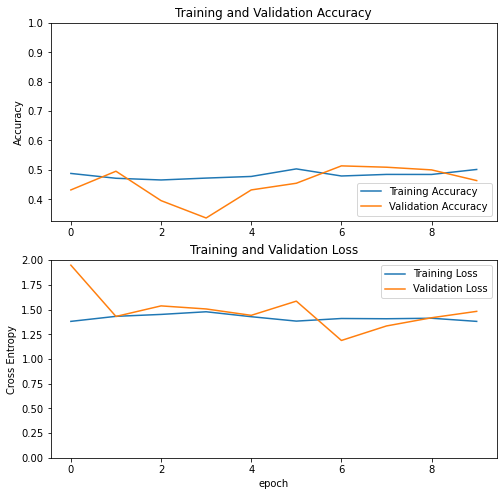

In [19]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [20]:
# final model for use later
model.save("/home/eyan/Desktop/bug_bite_old/models/3layers_CNN_51p.h5")

# Plotting accuracy comparision

In [7]:
import seaborn as sns
import pandas as pd

In [43]:
models = ['Random Guessing','Logistic Regression','Simple CNN','Inception v3-All layers frozen','Inception v3-Unfreeze last 1/3-Before tuning','Inception v3-Unfreeze last 1/3-After tuning']
accuracy = ['12.5','19','51','68','78','81']

df = pd.DataFrame({'Model':models,'Accuracy (%)':accuracy})

In [44]:
df

,Model,Accuracy (%)
0,Random Guessing,12.5
1,Logistic Regression,19
2,Simple CNN,51
3,Inception v3-All layers frozen,68
4,Inception v3-Unfreeze last 1/3-Before tuning,78
5,Inception v3-Unfreeze last 1/3-After tuning,81


[(0.0, 100.0)]

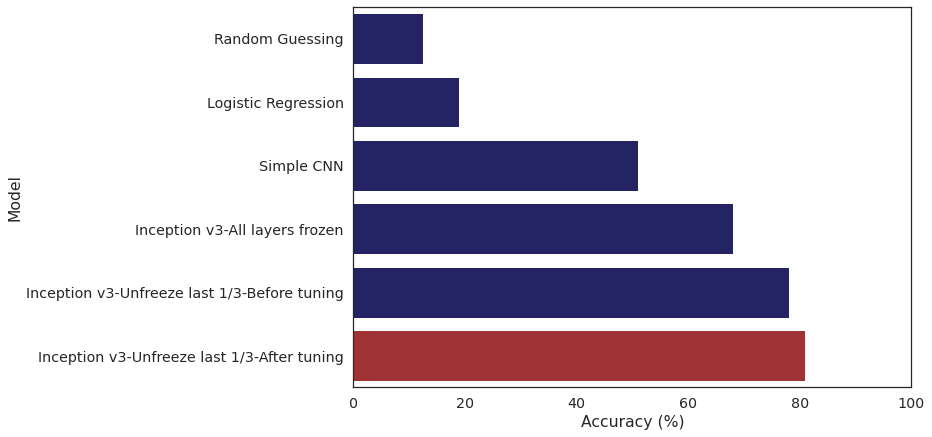

In [45]:
import matplotlib.pyplot as plt


sns.set(style="white",font_scale=1.3)

color_pal = {model: "firebrick" if model== "Inception v3-Unfreeze last 1/3-After tuning" else "midnightblue" for model in df.Model}

ax = sns.barplot(x='Accuracy (%)', y='Model',data=df,palette=color_pal)

ax.set(xlim=(0, 100))

